In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
partisan = pd.read_csv('PartisanYale.csv')
partisan = partisan[partisan.GeoType == 'State']

In [4]:
partisan

,GeoType,Group,GEOID,GeoName,TotalPop,congress,congressOppose,corporations,corporationsOppose,citizens,...,human,humanOppose,consensus,consensusOppose,worried,worriedOppose,harmUS,harmUSOppose,affectweather,affectweatherOppose
2,State,Dem,1,Alabama,1002395,76.146,7.743,78.097,5.923,75.321,...,69.957,23.220,63.587,15.148,75.875,24.264,73.523,12.055,79.397,2.891
3,State,Dem,2,Alaska,52317,83.047,4.399,86.345,4.150,83.006,...,79.694,12.363,77.261,15.360,88.566,11.428,82.665,10.429,85.473,1.877
4,State,Dem,4,Arizona,1255547,84.753,5.542,86.609,5.137,83.671,...,80.558,13.049,78.851,13.100,89.108,10.811,82.115,10.791,84.995,1.993
5,State,Dem,5,Arkansas,82227,82.500,7.283,83.593,5.701,80.278,...,75.262,17.279,68.200,15.933,83.295,16.747,78.755,12.731,81.890,2.793
6,State,Dem,6,California,8095215,87.355,5.629,87.594,5.146,85.519,...,82.957,10.940,80.708,10.569,90.347,9.625,84.449,10.106,88.113,1.722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,State,Rep,51,Virginia,2037158,42.179,24.941,55.992,15.883,47.758,...,36.666,44.441,35.407,44.526,42.027,58.199,38.064,54.149,42.898,10.823
98,State,Rep,53,Washington,1142865,36.032,31.857,53.252,17.858,44.937,...,31.557,50.153,36.116,45.963,40.582,59.296,38.660,54.180,44.534,11.295
99,State,Rep,54,West Virginia,382355,32.262,34.085,51.395,15.325,45.210,...,26.991,53.804,26.158,49.911,30.497,69.362,30.241,60.468,34.488,11.673
100,State,Rep,55,Wisconsin,1199268,37.730,26.090,55.396,14.397,46.300,...,36.732,46.405,33.894,45.706,38.961,61.007,36.952,54.673,42.398,11.349


In [3]:
state_alpha_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

partisan['Code'] = partisan['GeoName'].map(state_alpha_codes)

In [6]:
visualize_partisan = partisan[['Code','Group','happening']]

In [7]:
collective_df = pd.read_csv('state_ind_col.csv')
collective_df = collective_df.rename(columns={"State": "Code"})
collective_df = collective_df.merge(visualize_partisan,on = 'Code',how='outer')
collective_df

,Code,Index,Group,happening
0,HI,91,Dem,93.864
1,HI,91,Rep,58.832
2,LA,72,Dem,86.807
3,LA,72,Rep,48.281
4,SC,70,Dem,88.373
...,...,...,...,...
95,NE,35,Rep,48.595
96,OR,33,Dem,93.999
97,OR,33,Rep,52.568
98,MT,31,Dem,91.075


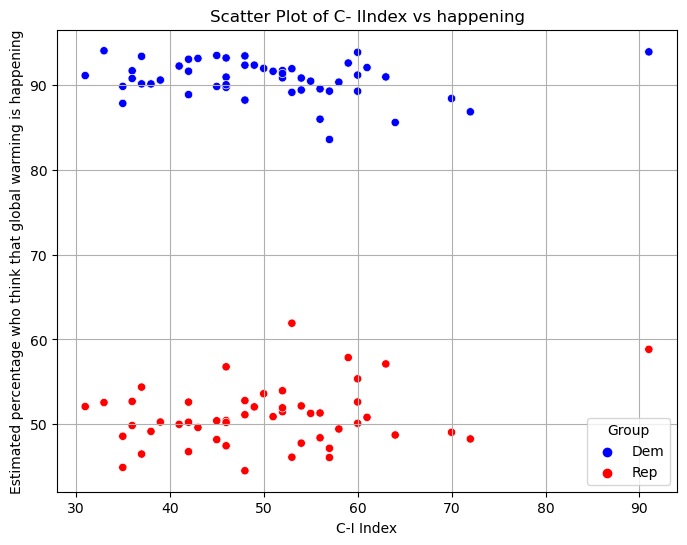

In [8]:
#happening - Estimated percentage who think that global warming is happening

plt.figure(figsize=(8, 6))
sns.scatterplot(data=collective_df, x="Index", y="happening", hue="Group", palette={"Dem": "blue", "Rep": "red"})

# Add labels
plt.xlabel('C-I Index')
plt.ylabel('Estimated percentage who think that global warming is happening')

# Show the plot
plt.title('Scatter Plot of C- IIndex vs happening')
plt.grid(True)
plt.legend(title='Group')
plt.show()


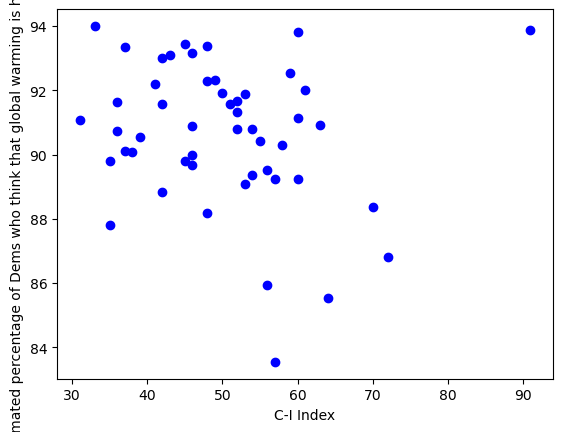

In [9]:
plt.scatter(data = collective_df[collective_df.Group == 'Dem'],x = 'Index', y='happening',color = 'blue')
plt.xlabel('C-I Index')
plt.ylabel('Estimated percentage of Dems who think that global warming is happening')
plt.show()

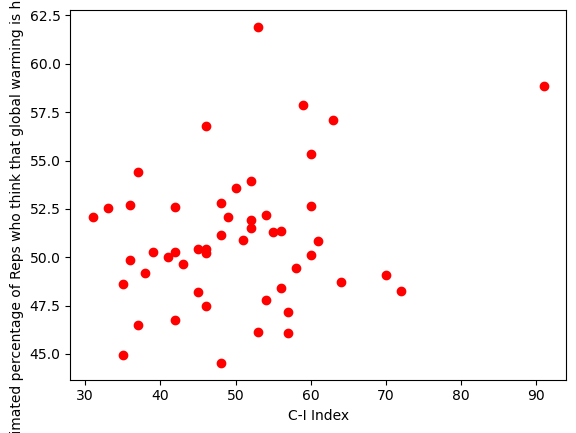

In [10]:
plt.scatter(data = collective_df[collective_df.Group == 'Rep'],x = 'Index', y='happening',color = 'Red')
plt.xlabel('C-I Index')
plt.ylabel('Estimated percentage of Reps who think that global warming is happening')
plt.show()

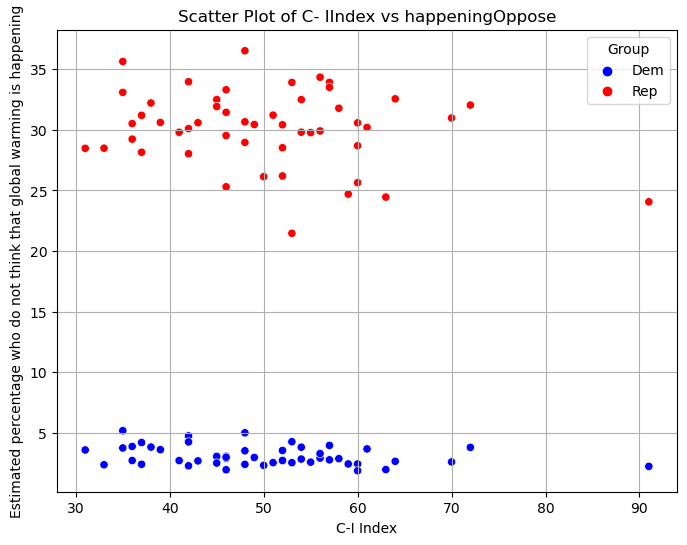

In [11]:
#happeningOppose - Estimated percentage who do not think that global warming is happening
visualize_partisan = partisan[['Code','Group','happeningOppose']]
collective_df = pd.read_csv('state_ind_col.csv')
collective_df = collective_df.rename(columns={"State": "Code"})
collective_df = collective_df.merge(visualize_partisan,on = 'Code',how='outer')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=collective_df, x="Index", y="happeningOppose", hue="Group", palette={"Dem": "blue", "Rep": "red"})

# Add labels
plt.xlabel('C-I Index')
plt.ylabel('Estimated percentage who do not think that global warming is happening')

# Show the plot
plt.title('Scatter Plot of C- IIndex vs happeningOppose')
plt.grid(True)
plt.legend(title='Group')
plt.show()


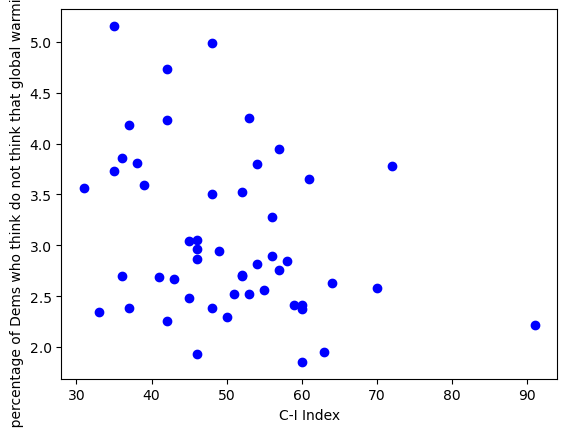

In [12]:
plt.scatter(data = collective_df[collective_df.Group == 'Dem'],x = 'Index', y='happeningOppose',color = 'blue')
plt.xlabel('C-I Index')
plt.ylabel('Estimated percentage of Dems who think do not think that global warming is happening')
plt.show()

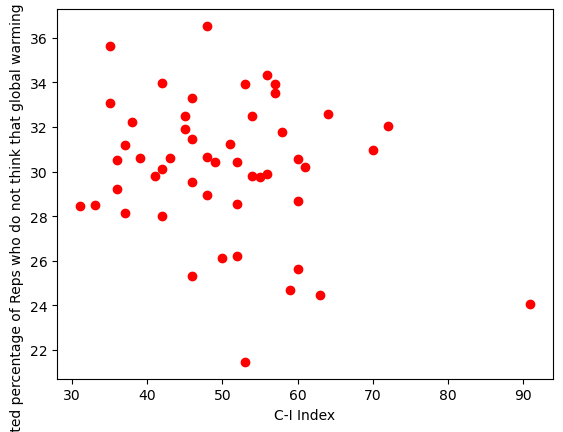

In [13]:
plt.scatter(data = collective_df[collective_df.Group == 'Rep'],x = 'Index', y='happeningOppose',color = 'Red')
plt.xlabel('C-I Index')
plt.ylabel('Estimated percentage of Reps who do not think that global warming is happening')
plt.show()

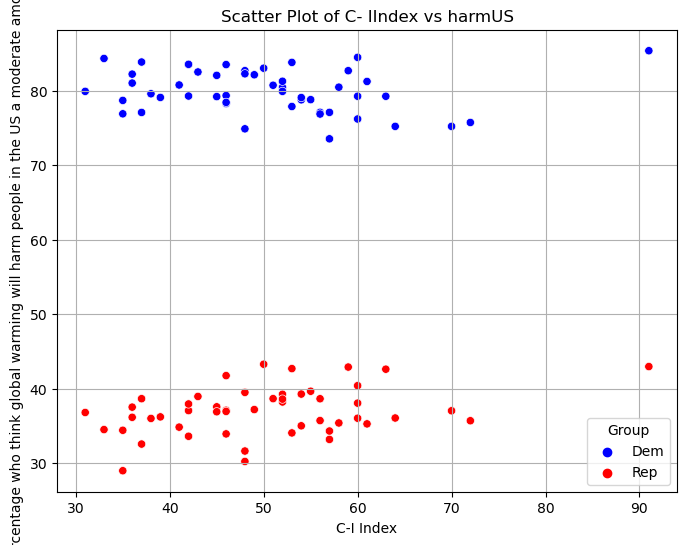

In [14]:
#harmUS - Estimated percentage who think global warming will harm people in the US a moderate amount/a great deal
visualize_partisan = partisan[['Code','Group','harmUS']]
collective_df = pd.read_csv('state_ind_col.csv')
collective_df = collective_df.rename(columns={"State": "Code"})
collective_df = collective_df.merge(visualize_partisan,on = 'Code',how='outer')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=collective_df, x="Index", y="harmUS", hue="Group", palette={"Dem": "blue", "Rep": "red"})

# Add labels
plt.xlabel('C-I Index')
plt.ylabel('Estimated percentage who think global warming will harm people in the US a moderate amount/a great deal')

# Show the plot
plt.title('Scatter Plot of C- IIndex vs harmUS')
plt.grid(True)
plt.legend(title='Group')
plt.show()

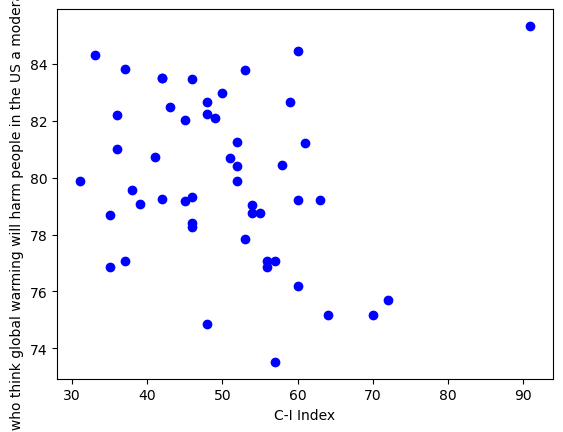

In [15]:
plt.scatter(data = collective_df[collective_df.Group == 'Dem'],x = 'Index', y='harmUS',color = 'blue')
plt.xlabel('C-I Index')
plt.ylabel('percentage Dems who think global warming will harm people in the US a moderate amount/a great deal')
plt.show()

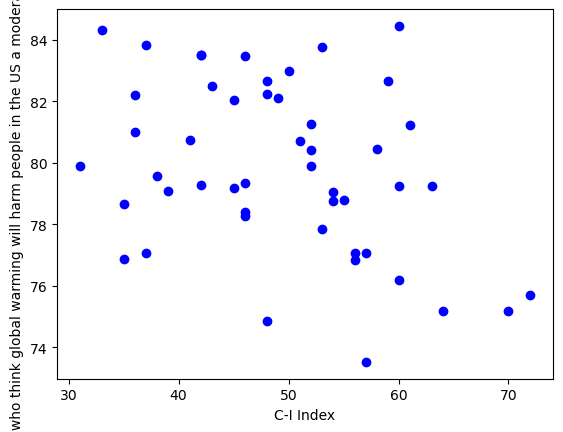

In [16]:
plt.scatter(data = collective_df[(collective_df.Group == 'Dem')&(collective_df.Code !='HI')],x = 'Index', y='harmUS',color = 'blue')
plt.xlabel('C-I Index')
plt.ylabel('percentage Dems who think global warming will harm people in the US a moderate amount/a great deal')
plt.show()

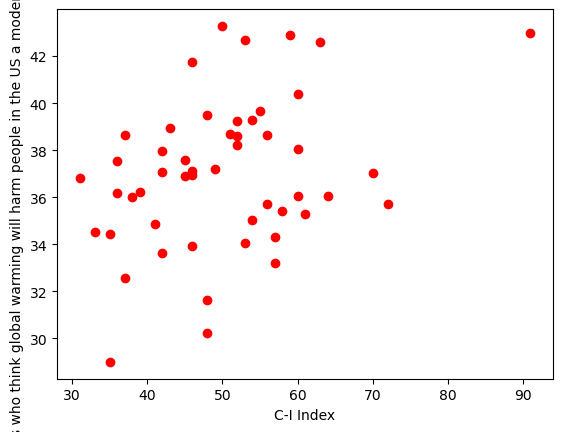

In [17]:
plt.scatter(data = collective_df[collective_df.Group == 'Rep'],x = 'Index', y='harmUS',color = 'Red')
plt.xlabel('C-I Index')
plt.ylabel('percentage of Reps who think global warming will harm people in the US a moderate amount/a great deal')
plt.show()

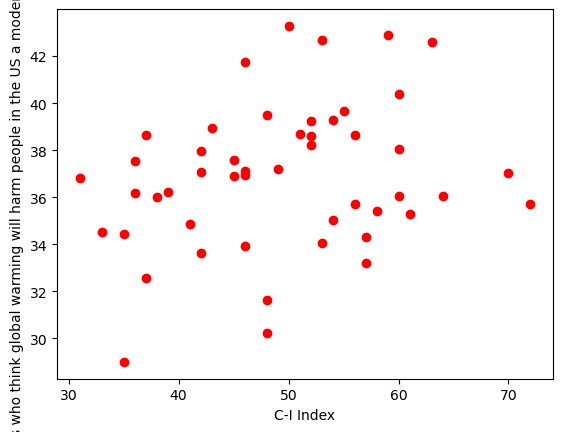

In [18]:
plt.scatter(data = collective_df[(collective_df.Group == 'Rep')&(collective_df.Code !='HI')],x = 'Index', y='harmUS',color = 'Red')
plt.xlabel('C-I Index')
plt.ylabel('percentage of Reps who think global warming will harm people in the US a moderate amount/a great deal')
plt.show()

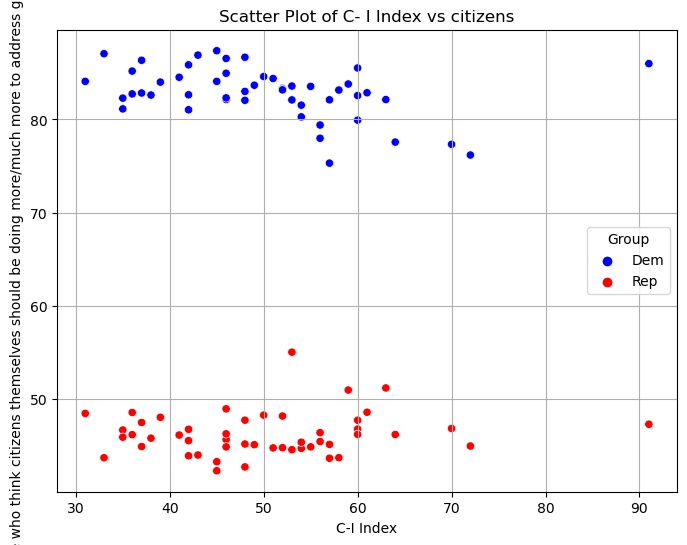

In [19]:
#citizen - Estimated percentage who think citizens themselves should be doing more/much more to address global warming
visualize_partisan = partisan[['Code','Group','citizens']]
collective_df = pd.read_csv('state_ind_col.csv')
collective_df = collective_df.rename(columns={"State": "Code"})
collective_df = collective_df.merge(visualize_partisan,on = 'Code',how='outer')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=collective_df, x="Index", y="citizens", hue="Group", palette={"Dem": "blue", "Rep": "red"})

# Add labels
plt.xlabel('C-I Index')
plt.ylabel('percentage who think citizens themselves should be doing more/much more to address global warming')

# Show the plot
plt.title('Scatter Plot of C- I Index vs citizens')
plt.grid(True)
plt.legend(title='Group')
plt.show()

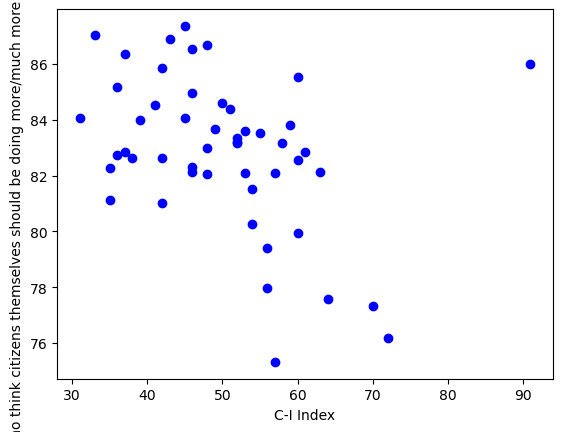

In [20]:
plt.scatter(data = collective_df[collective_df.Group == 'Dem'],x = 'Index', y='citizens',color = 'blue')
plt.xlabel('C-I Index')
plt.ylabel('percentage Dems who think citizens themselves should be doing more/much more to address global warming')
plt.show()

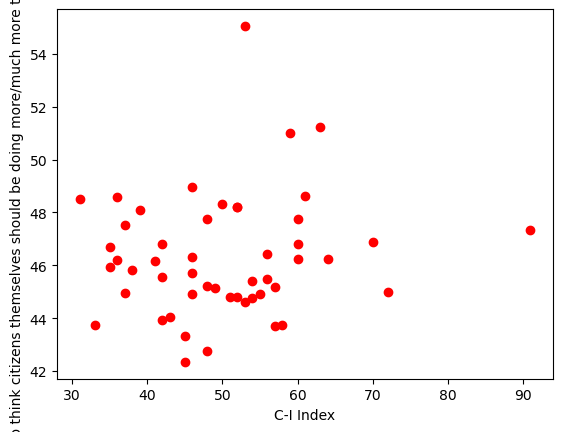

In [21]:
plt.scatter(data = collective_df[collective_df.Group == 'Rep'],x = 'Index', y='citizens',color = 'red')
plt.xlabel('C-I Index')
plt.ylabel('percentage Rep who think citizens themselves should be doing more/much more to address global warming')
plt.show()

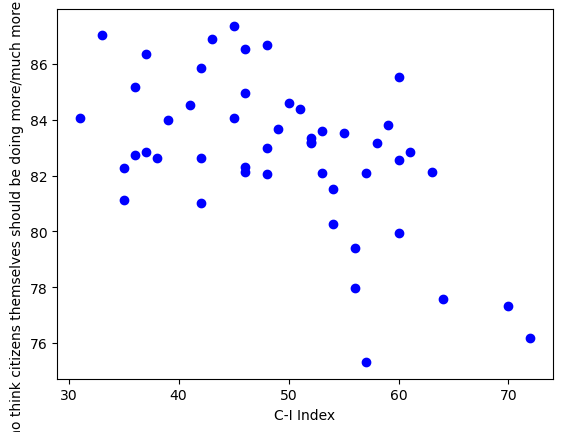

In [22]:
plt.scatter(data = collective_df[(collective_df.Group == 'Dem')& (collective_df.Code != 'HI')],x = 'Index', y='citizens',color = 'blue')
plt.xlabel('C-I Index')
plt.ylabel('percentage Dems who think citizens themselves should be doing more/much more to address global warming')
plt.show()

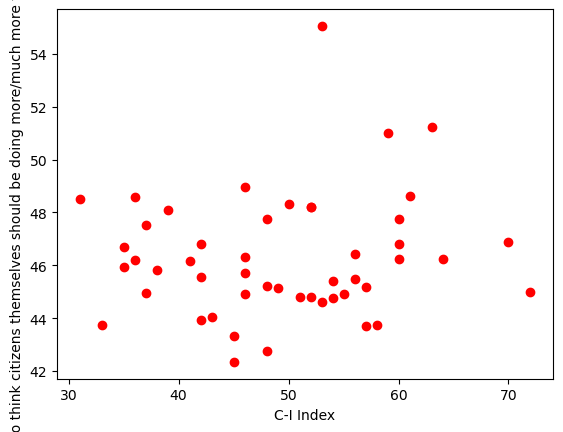

In [23]:
plt.scatter(data = collective_df[(collective_df.Group == 'Rep')& (collective_df.Code != 'HI')],x = 'Index', y='citizens',color = 'red')
plt.xlabel('C-I Index')
plt.ylabel('percentage Reps who think citizens themselves should be doing more/much more to address global warming')
plt.show()

In [24]:
#fundrenewables - Estimated percentage who somewhat/strongly support funding research into renewable energy sources
#fundrenewablesOppose - Estimated percentage who somewhat/strongly oppose funding research into renewable energy sources
#supportRPS - Estimated percentage who somewhat/strongly support requiring utilities to produce 20% electricity from renewable sources
#prienv - Estimated percentage who think protecting the environment is more important than economic growth, even if it reduces economic growth
visualize_partisan = partisan[['Code','Group','fundrenewables','fundrenewablesOppose','supportRPS','prienv' ]]
collective_df = pd.read_csv('state_ind_col.csv')
collective_df = collective_df.rename(columns={"State": "Code"})
collective_df = collective_df.merge(visualize_partisan,on = 'Code',how='outer')


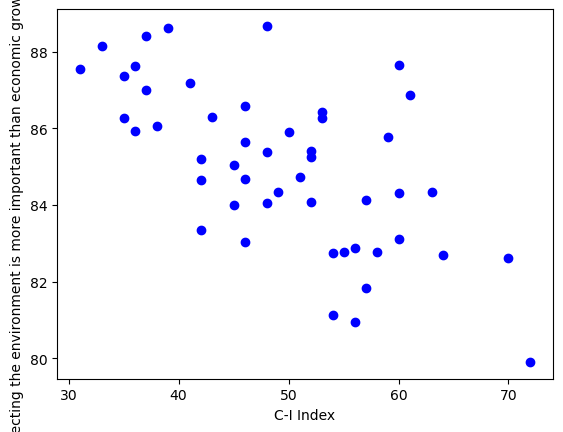

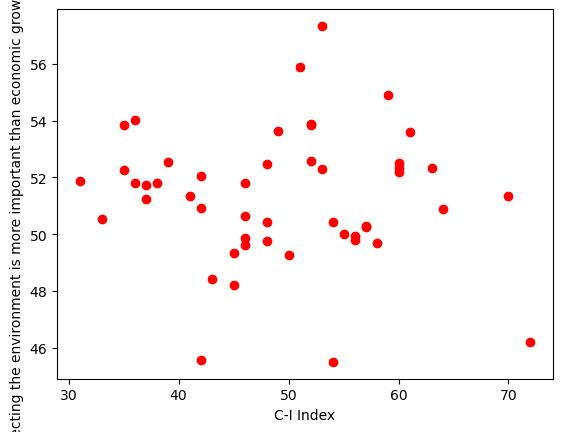

In [25]:
plt.scatter(data = collective_df[(collective_df.Group == 'Dem')& (collective_df.Code != 'HI')],x = 'Index', y='prienv',color = 'blue')
plt.xlabel('C-I Index')
plt.ylabel('percentage Dems who think protecting the environment is more important than economic growth, even if it reduces economic growth')
plt.show()

plt.scatter(data = collective_df[(collective_df.Group == 'Rep')& (collective_df.Code != 'HI')],x = 'Index', y='prienv',color = 'red')
plt.xlabel('C-I Index')
plt.ylabel('percentage Reps who think protecting the environment is more important than economic growth, even if it reduces economic growth')
plt.show()

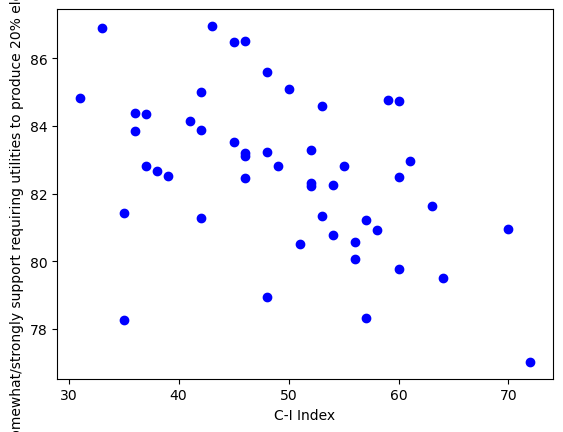

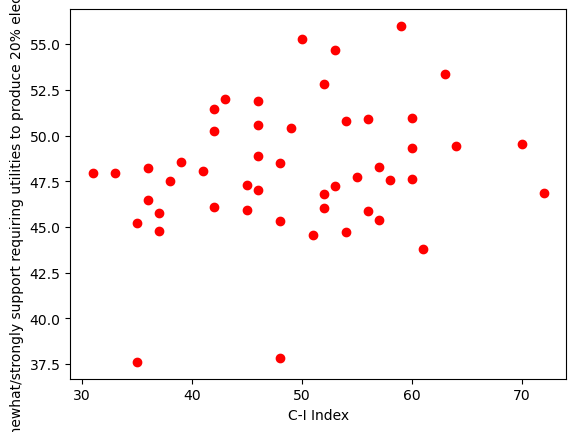

In [26]:
plt.scatter(data = collective_df[(collective_df.Group == 'Dem')& (collective_df.Code != 'HI')],x = 'Index', y='supportRPS',color = 'blue')
plt.xlabel('C-I Index')
plt.ylabel('percentage Dems wwho somewhat/strongly support requiring utilities to produce 20% electricity from renewable sources')
plt.show()

plt.scatter(data = collective_df[(collective_df.Group == 'Rep')& (collective_df.Code != 'HI')],x = 'Index', y='supportRPS',color = 'red')
plt.xlabel('C-I Index')
plt.ylabel('percentage Repswho somewhat/strongly support requiring utilities to produce 20% electricity from renewable sources')
plt.show()

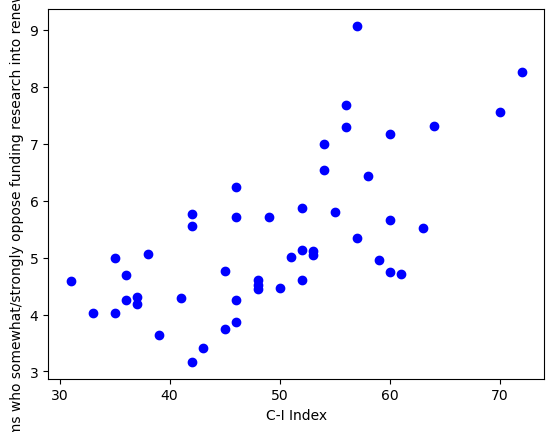

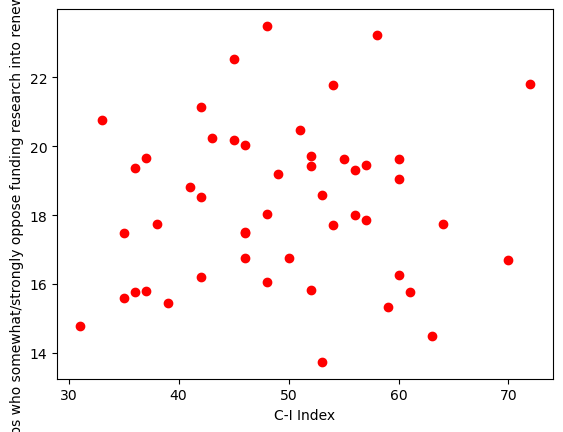

In [27]:
#fundrenewablesOppose - Estimated percentage who somewhat/strongly oppose funding research into renewable energy sources
plt.scatter(data = collective_df[(collective_df.Group == 'Dem')& (collective_df.Code != 'HI')],x = 'Index', y='fundrenewablesOppose',color = 'blue')
plt.xlabel('C-I Index')
plt.ylabel('percentage Dems who somewhat/strongly oppose funding research into renewable energy sources')
plt.show()

plt.scatter(data = collective_df[(collective_df.Group == 'Rep')& (collective_df.Code != 'HI')],x = 'Index', y='fundrenewablesOppose',color = 'red')
plt.xlabel('C-I Index')
plt.ylabel('percentage Reps who somewhat/strongly oppose funding research into renewable energy sources')
plt.show()

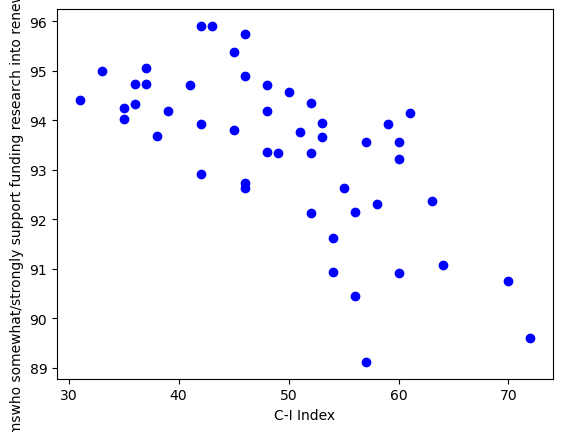

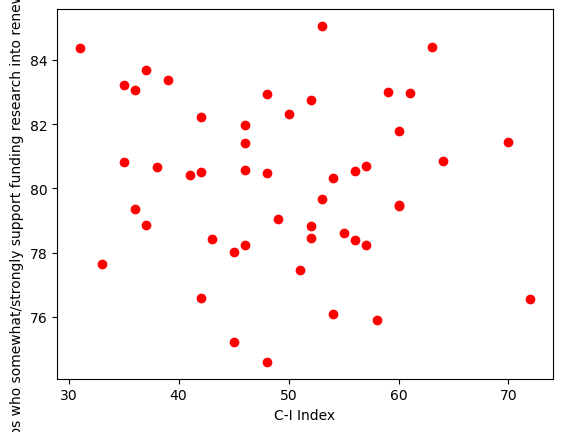

In [28]:
#fundrenewables - Estimated percentage who somewhat/strongly support funding research into renewable energy sources

plt.scatter(data = collective_df[(collective_df.Group == 'Dem')& (collective_df.Code != 'HI')],x = 'Index', y='fundrenewables',color = 'blue')
plt.xlabel('C-I Index')
plt.ylabel('percentage Demswho somewhat/strongly support funding research into renewable energy sources')
plt.show()

plt.scatter(data = collective_df[(collective_df.Group == 'Rep')& (collective_df.Code != 'HI')],x = 'Index', y='fundrenewables',color = 'red')
plt.xlabel('C-I Index')
plt.ylabel('percentage Reps who somewhat/strongly support funding research into renewable energy sources')
plt.show()

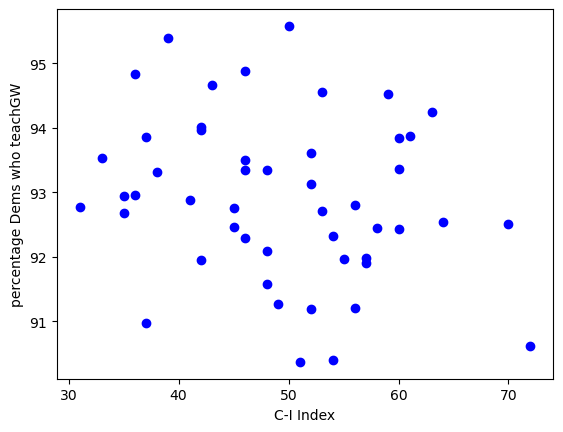

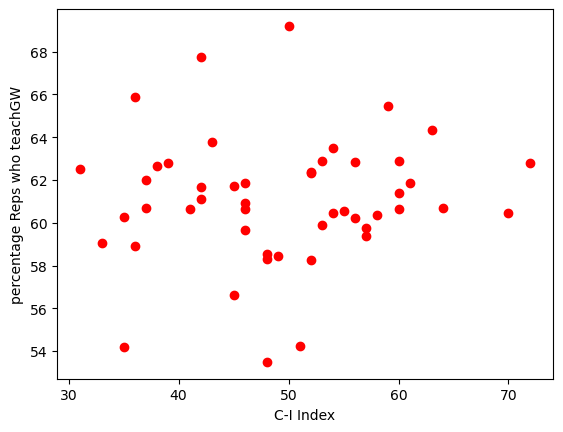

In [29]:
# teachGW - Estimated percentage who somewhat/strongly agree that schools should teach about the causes, consequences, and potential solutions to global warming
visualize_partisan = partisan[['Code','Group','teachGW']]
collective_df = pd.read_csv('state_ind_col.csv')
collective_df = collective_df.rename(columns={"State": "Code"})
collective_df = collective_df.merge(visualize_partisan,on = 'Code',how='outer')

plt.scatter(data = collective_df[(collective_df.Group == 'Dem')& (collective_df.Code != 'HI')],x = 'Index', y='teachGW',color = 'blue')
plt.xlabel('C-I Index')
plt.ylabel('percentage Dems who teachGW')
plt.show()

plt.scatter(data = collective_df[(collective_df.Group == 'Rep')& (collective_df.Code != 'HI')],x = 'Index', y='teachGW',color = 'red')
plt.xlabel('C-I Index')
plt.ylabel('percentage Reps who teachGW')
plt.show()

In [30]:
#gdp per capita in US$
gdp_countries = pd.read_csv('gdp_countries.csv',skiprows=4)
#wave 7 2017-2022
gdp_countries = gdp_countries[['Country Code', '2017','2018','2019','2020','2021','2022']]
gdp_countries['GDP_per_capita'] = gdp_countries[['2017', '2018', '2019', '2020', '2021', '2022']].mean(axis = 1)
gdp_countries.drop(columns=['2017','2018','2019','2020','2021','2022'],inplace=True)


In [32]:
gdp_countries.rename(columns={'Country Code': 'Code'}, inplace=True)
collective_df = collective_df.merge(gdp_countries,on='Code',how = 'outer')

In [33]:
collective_df

,Code,Index,Group,teachGW,GDP_per_capita
0,HI,91.0,Dem,93.582,NaN
1,HI,91.0,Rep,63.381,NaN
2,LA,72.0,Dem,90.614,NaN
3,LA,72.0,Rep,62.788,NaN
4,SC,70.0,Dem,92.512,NaN
...,...,...,...,...,...
361,XKX,NaN,NaN,NaN,4623.622365
362,YEM,NaN,NaN,NaN,692.293324
363,ZAF,NaN,NaN,NaN,6674.155752
364,ZMB,NaN,NaN,NaN,1303.526137


In [4]:
collective_df = pd.read_csv('state_ind_col.csv')
collective_df = collective_df.rename(columns={"State": "Code"})


In [5]:
# scatter plots with control for personal income
visualize_partisan = partisan[['Code','Group','happening']]
collective_df = collective_df.merge(visualize_partisan,on = 'Code',how='outer')
collective_df


,Code,Index,Group,happening
0,HI,91,Dem,93.864
1,HI,91,Rep,58.832
2,LA,72,Dem,86.807
3,LA,72,Rep,48.281
4,SC,70,Dem,88.373
...,...,...,...,...
95,NE,35,Rep,48.595
96,OR,33,Dem,93.999
97,OR,33,Rep,52.568
98,MT,31,Dem,91.075


In [9]:
income = pd.read_csv('income.csv')
income = income.infer_objects()
income.head()

,Code,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008
0,AL,"41,539","40,223","39,014","38,531","37,055","36,014","35,824","35,010","33,946","32,769","33,583"
1,AK,"59,618","57,189","56,278","57,575","55,867","52,812","53,708","52,569","49,652","47,258","47,869"
2,AZ,"45,466","43,497","41,473","40,334","38,756","37,139","36,545","35,321","33,876","33,524","35,748"
3,AR,"43,384","41,890","40,873","39,968","38,749","36,677","36,582","34,279","32,372","31,472","32,306"
4,CA,"61,508","58,804","56,560","54,546","51,266","48,502","48,121","45,557","43,246","41,689","43,567"


In [11]:
list_dates = ['2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008']
for i in list_dates:
    income[i] = income[i].str.replace(',', '')

In [14]:
for i in list_dates:
    income[i] = income[i].astype(float)
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    51 non-null     object 
 1   2018    51 non-null     float64
 2   2017    51 non-null     float64
 3   2016    51 non-null     float64
 4   2015    51 non-null     float64
 5   2014    51 non-null     float64
 6   2013    51 non-null     float64
 7   2012    51 non-null     float64
 8   2011    51 non-null     float64
 9   2010    51 non-null     float64
 10  2009    51 non-null     float64
 11  2008    51 non-null     float64
dtypes: float64(11), object(1)
memory usage: 4.9+ KB


In [15]:
income['avg_income'] = income[list_dates].mean(axis = 1)
income.head()

,Code,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,avg_income
0,AL,41539.0,40223.0,39014.0,38531.0,37055.0,36014.0,35824.0,35010.0,33946.0,32769.0,33583.0,36682.545455
1,AK,59618.0,57189.0,56278.0,57575.0,55867.0,52812.0,53708.0,52569.0,49652.0,47258.0,47869.0,53672.272727
2,AZ,45466.0,43497.0,41473.0,40334.0,38756.0,37139.0,36545.0,35321.0,33876.0,33524.0,35748.0,38334.454545
3,AR,43384.0,41890.0,40873.0,39968.0,38749.0,36677.0,36582.0,34279.0,32372.0,31472.0,32306.0,37141.090909
4,CA,61508.0,58804.0,56560.0,54546.0,51266.0,48502.0,48121.0,45557.0,43246.0,41689.0,43567.0,50306.000000


In [16]:
income.drop(columns=list_dates, inplace=True)
income.head()

,Code,avg_income
0,AL,36682.545455
1,AK,53672.272727
2,AZ,38334.454545
3,AR,37141.090909
4,CA,50306.000000


In [17]:
Rep_happening = collective_df[collective_df.Group =='Rep'].merge(income, on='Code',how='outer')
Dem_happening = collective_df[collective_df.Group =='Dem'].merge(income, on='Code',how='outer')

In [28]:
Rep_happening = Rep_happening[~Rep_happening.Index.isna()]
Dem_happening = Dem_happening[~Dem_happening.Index.isna()]

eval_env: 1


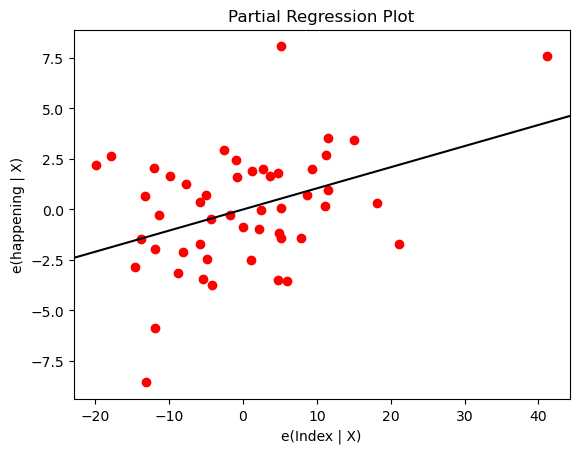

In [30]:
sm.graphics.plot_partregress(data = Rep_happening,endog = 'happening',exog_i = 'Index',exog_others=['avg_income'],obs_labels=False,color = 'red')
plt.show()

eval_env: 1


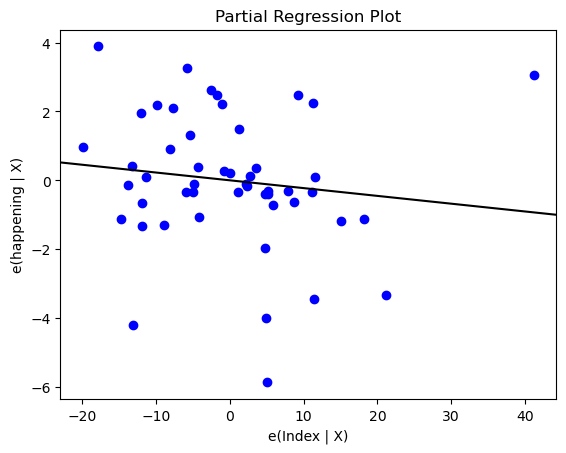

In [31]:
sm.graphics.plot_partregress(data = Dem_happening,endog = 'happening',exog_i = 'Index',exog_others=['avg_income'],obs_labels=False,color = 'blue')
plt.show()

In [32]:
collective_df = pd.read_csv('state_ind_col.csv')
collective_df = collective_df.rename(columns={"State": "Code"})
visualize_partisan = partisan[['Code','Group','prienv']]
collective_df = collective_df.merge(visualize_partisan,on = 'Code',how='outer')
collective_df

,Code,Index,Group,prienv
0,HI,91,Dem,87.369
1,HI,91,Rep,52.335
2,LA,72,Dem,79.908
3,LA,72,Rep,46.184
4,SC,70,Dem,82.623
...,...,...,...,...
95,NE,35,Rep,52.275
96,OR,33,Dem,88.153
97,OR,33,Rep,50.521
98,MT,31,Dem,87.538


eval_env: 1


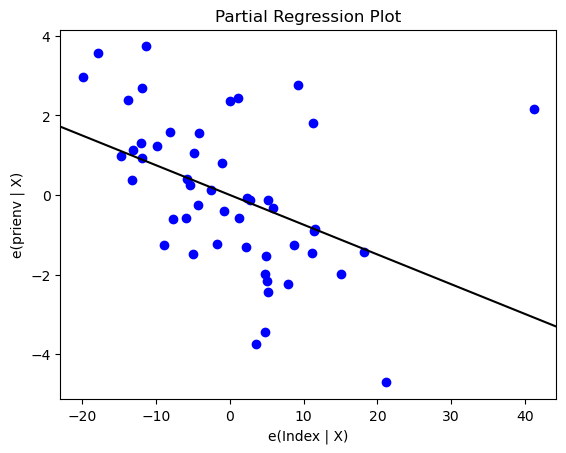

eval_env: 1


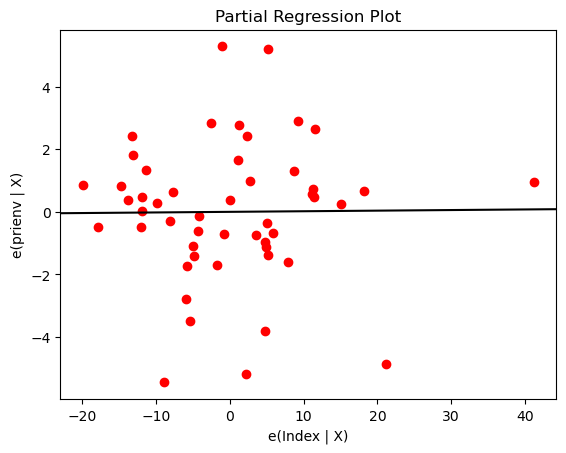

In [33]:
Rep_happening = collective_df[collective_df.Group =='Rep'].merge(income, on='Code',how='outer')
Dem_happening = collective_df[collective_df.Group =='Dem'].merge(income, on='Code',how='outer')
Rep_happening = Rep_happening[~Rep_happening.Index.isna()]
Dem_happening = Dem_happening[~Dem_happening.Index.isna()]
sm.graphics.plot_partregress(data = Dem_happening,endog = 'prienv',exog_i = 'Index',exog_others=['avg_income'],obs_labels=False,color = 'blue')
plt.show()
sm.graphics.plot_partregress(data = Rep_happening,endog = 'prienv',exog_i = 'Index',exog_others=['avg_income'],obs_labels=False,color = 'red')
plt.show()

eval_env: 1


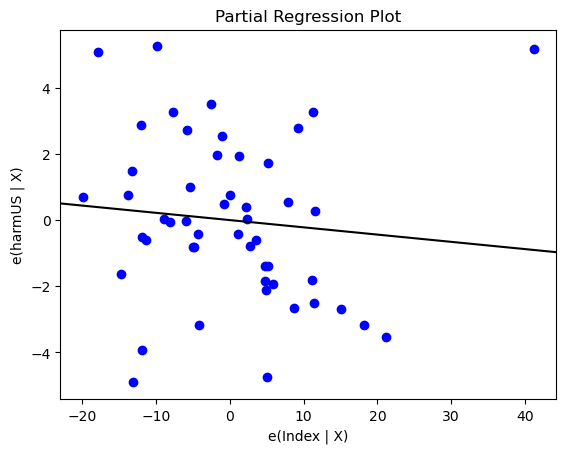

eval_env: 1


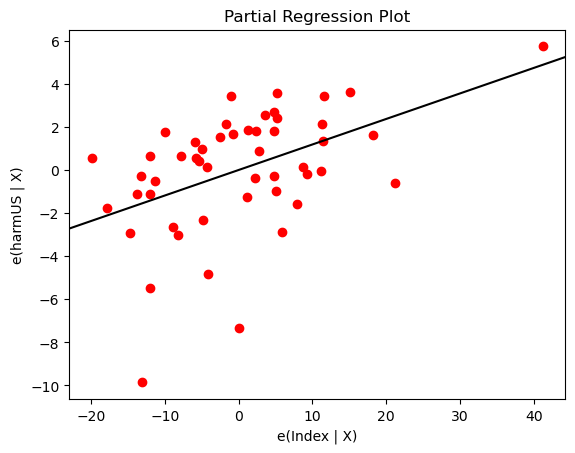

In [39]:
collective_df = pd.read_csv('state_ind_col.csv')
collective_df = collective_df.rename(columns={"State": "Code"})
visualize_partisan = partisan[['Code','Group','harmUS']]
collective_df = collective_df.merge(visualize_partisan,on = 'Code',how='outer')
collective_df
Rep_happening = collective_df[collective_df.Group =='Rep'].merge(income, on='Code',how='outer')
Dem_happening = collective_df[collective_df.Group =='Dem'].merge(income, on='Code',how='outer')
Rep_happening = Rep_happening[~Rep_happening.Index.isna()]
Dem_happening = Dem_happening[~Dem_happening.Index.isna()]
sm.graphics.plot_partregress(data = Dem_happening,endog = 'harmUS',exog_i = 'Index',exog_others=['avg_income'],obs_labels=False,color = 'blue')
plt.show()
sm.graphics.plot_partregress(data = Rep_happening,endog = 'harmUS',exog_i = 'Index',exog_others=['avg_income'],obs_labels=False,color = 'red')
plt.show()